In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.set_style('darkgrid')

In [15]:
data=pd.read_excel('http://www.ggdc.net/maddison/maddison-project/data/mpd_2013-01.xlsx',skiprows=[0,1],header=0)
#data=pd.read_excel('maddison.xlsx',header=0)
data.rename(columns={'F. USSR ':'USSR',
                     '(Centre-   North)           Italy ':'Italy',
                     'Indonesia (Java before 1880)':'Indonesia',
                    'Cape Colony/ South Africa ':'South Africa',
                    'Holland/     Netherlands ':'Netherlands',
                    'England/GB/UK':'United Kingdom',
                    'N. Zealand ':'New Zealand',
                    'Unnamed: 0':'Year'},inplace=True)
data=data[['Year','USA']]


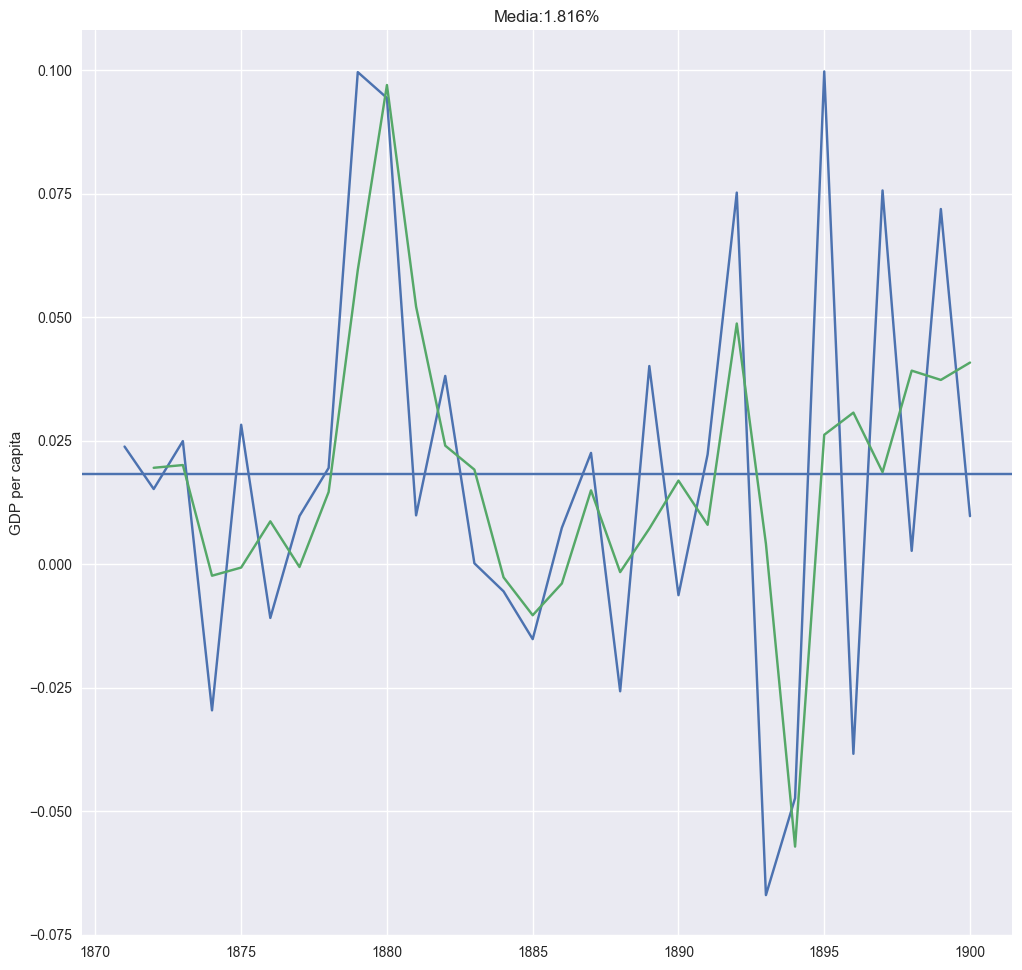

In [44]:
plt.figure(figsize=(12,12))
data2=data[(data['Year']>=1870) & (data['Year']<=1900)][['Year','USA']]
plt.plot(data2['Year'],data2['USA'].pct_change())
plt.axhline(data2['USA'].pct_change().mean())
plt.ylabel('GDP per capita')
plt.title("Media:{:.3f}%".format(data2['USA'].pct_change().mean()*100))
plt.plot(data2['Year'],data2['USA'].pct_change().rolling(window=2,center=True).mean())

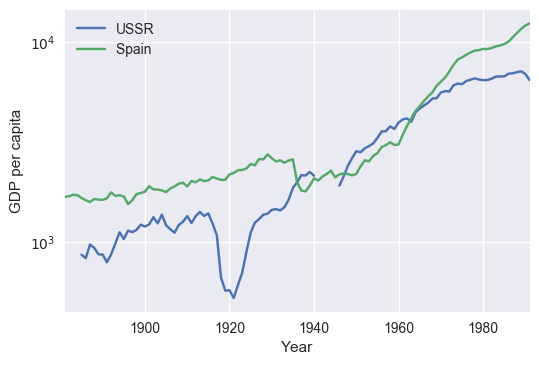

In [4]:
data2.plot(x='Year',logy=True)
plt.ylabel('GDP per capita')

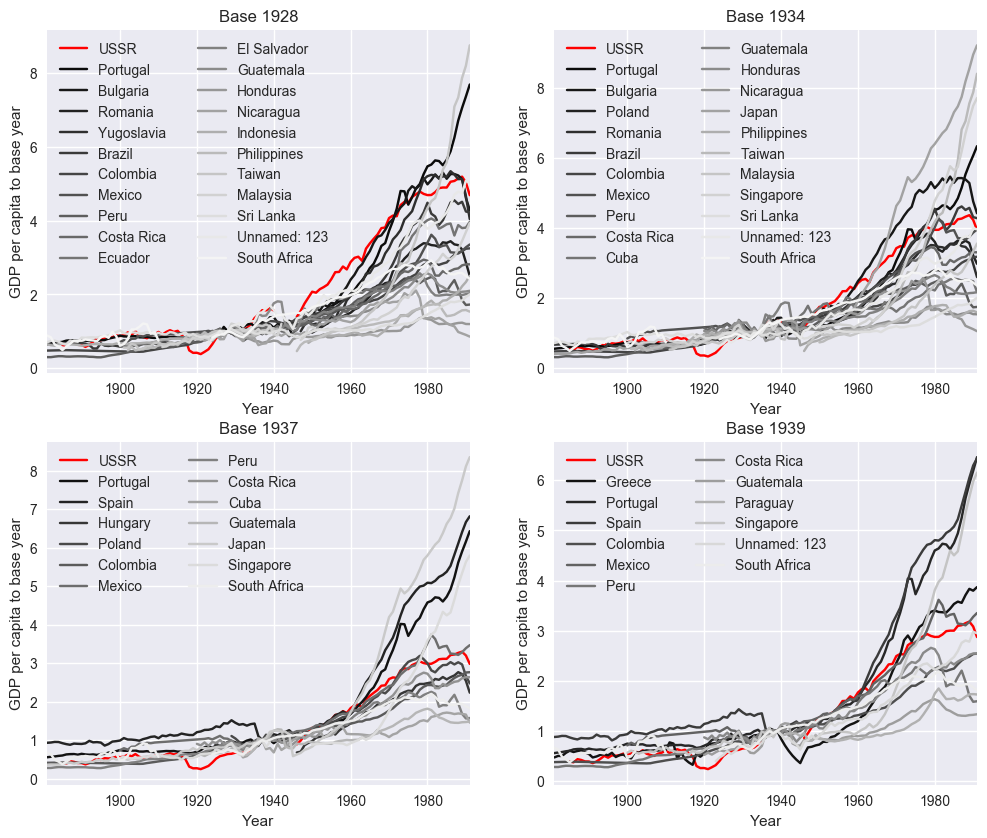

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,10))
e=500
anomalies=['Year','8 L. America','USSR','Unnamed: 107','21 Caribbean']
ussr=['USSR']
#countries=['USSR','Spain ','Japan ','Mexico ']
dic={0:(0,0),1:(0,1),2:(1,0),3:(1,1)}
years=[1928,1934,1937,1939]

for i in range(len(years)):
    year=years[i]
    ax=axes[dic[i]]
    sov_gdp=data[data.Year==year]['USSR'].values[0]
    around=pd.eval('data[data.Year==year][(data>sov_gdp-e)&(data<sov_gdp+e)]').dropna(axis=1,inplace=False).columns.drop(anomalies,errors='ignore')
    countries=ussr+around.tolist()
    indexed=data[(data['Year']>1880) & (data['Year']<1992)][countries+['Year']]
    minvals=data[data['Year']==year][countries].index[0]
    indexed[countries]=indexed[countries]/indexed.loc[minvals][countries]
    pal=[(1,0,0,1)]+sns.color_palette("gray", len(countries)-1)   
    
    p=indexed.plot(x='Year',ax=ax,title='Base '+str(year),color=pal) 



    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,ncol=2,loc='best')
    ax.set_ylabel('GDP per capita to base year')
    
plt.show()


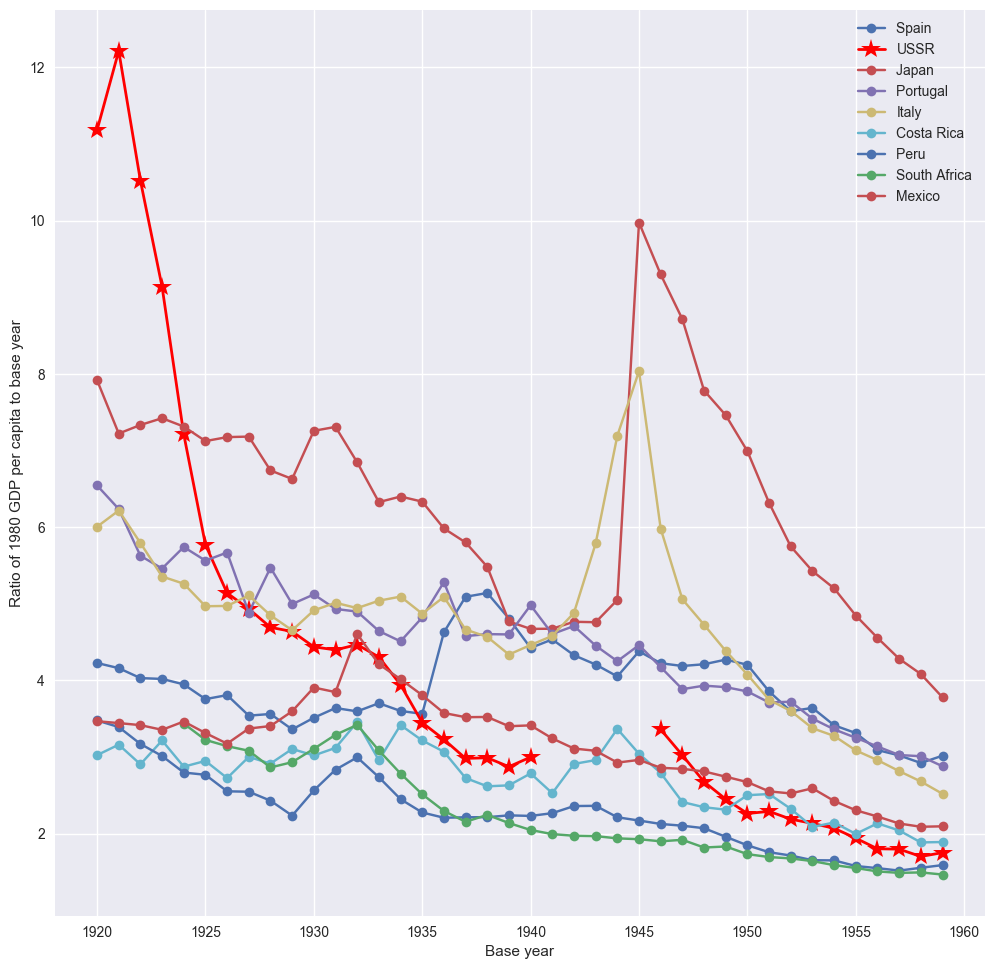

In [6]:
fig=plt.figure(figsize=(8,12))
countries=['Spain ','USSR','Japan ','Portugal ',
           'Italy','Costa Rica','Peru ','South Africa',
           'Mexico '          
          
          ]
years=np.arange(1920,1960)
last=np.zeros((len(years),len(countries)))
sns.set_palette(sns.color_palette("husl",n_colors=len(countries)))
indexed=data[(data['Year']>1900) & (data['Year']<1992)][countries+['Year']]
for i in range(len(years)):
    year=years[i]    
    minvals=indexed[indexed['Year']==year].index[0]
    last[i,:]=indexed[indexed['Year']==1980][countries]/(indexed.loc[minvals][countries])
sns.set_palette(sns.color_palette("deep"))
plt.figure(figsize=(12,12))
pal=sns.color_palette("deep", len(countries))
for i in range(len(countries)):
    
    if countries[i]=='USSR':
        plt.plot(years,last[:,i],label=countries[i],c='red',marker='*',linewidth=2,ms=15)
    else:
        plt.plot(years,last[:,i],label=countries[i],c=pal[i],marker='o')
        
plt.ylabel('Ratio of 1980 GDP per capita to base year')
plt.xlabel('Base year')
plt.legend()

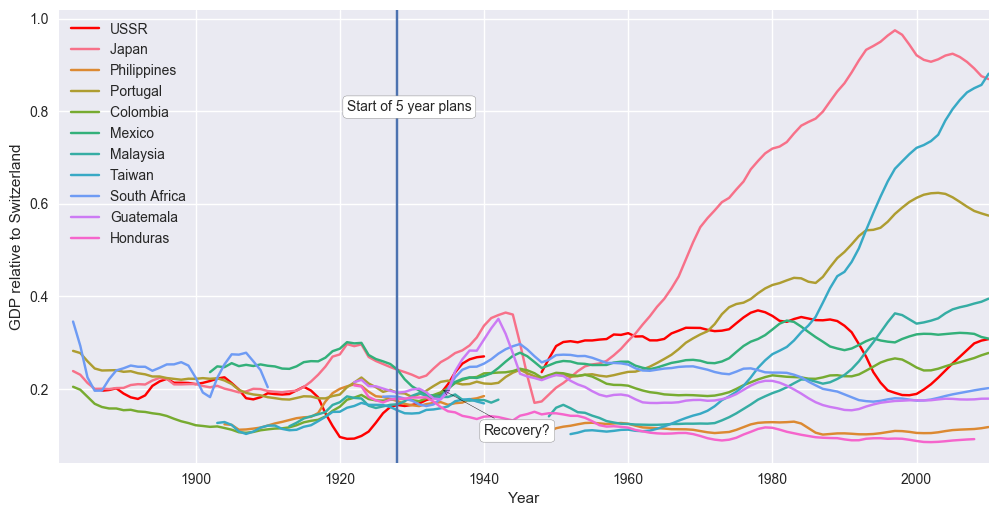

In [7]:
countries=['USSR','Japan ','Philippines','Portugal ','Colombia ','Mexico ','Malaysia ','Taiwan','South Africa','Guatemala','Honduras']
plt.figure(figsize=(12,6))
indexed=data[(data['Year']>1880) & (data['Year']<2015)][countries+['Year']]
indexed[countries]=indexed[countries].div(data['Switzerland '],axis=0).rolling(window=3).mean()
sns.set_palette(sns.color_palette("husl",n_colors=len(countries)))
indexed.plot(x='Year',ax=plt.gca(),color=[(1,0,0,1)]+sns.color_palette("husl", len(countries)-1))    
plt.ylabel('GDP relative to Switzerland')
plt.axvline(x=1928)
plt.gca().annotate('Recovery?',xy=(1934,0.2),xytext=(1940,0.1),arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="round", fc="white", ec="gray"))
plt.gca().annotate('Start of 5 year plans',xy=(1928,0.15),xytext=(1921,0.8),bbox=dict(boxstyle="round", fc="white", ec="gray"))
plt.figure()
sns.set_palette(sns.color_palette("deep"))

0.3111111111111111


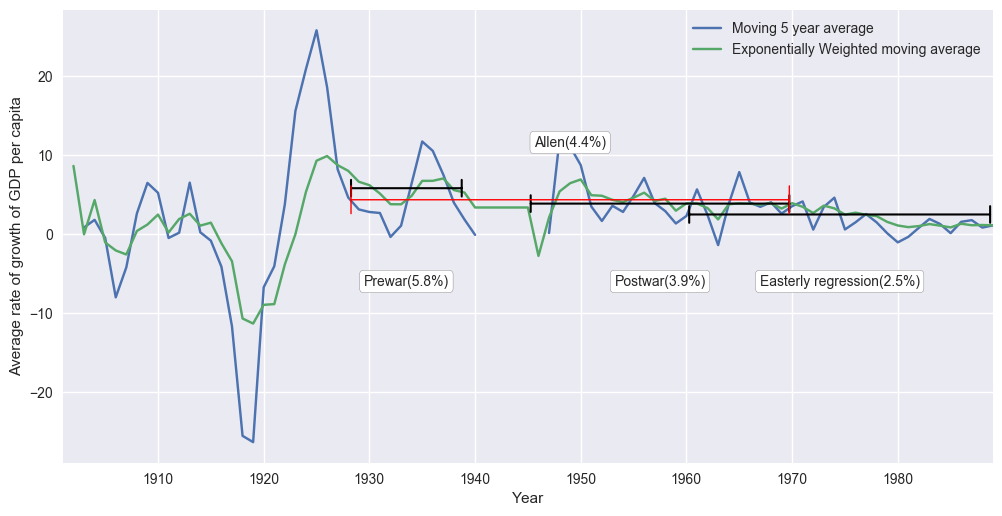

In [8]:
countries=['USSR']

fig=plt.figure(figsize=(12,6))
data2=data[(data['Year']>1900) & (data['Year']<1990)][countries+['Year']]
data2_percent=data2[countries].pct_change().rolling(window=2,center=True).mean().copy()*100
data2_percent.rename(columns={'USSR':'Moving 5 year average'},inplace=True)
data2_percent['Exponentially Weighted moving average']=data2[countries].pct_change().ewm(alpha=0.2).mean().copy()*100
data2_percent['Year']=data['Year']
data2_percent.plot(x='Year',ax=plt.gca())
plt.ylabel('Average rate of growth of GDP per capita')
#Mean for Stalinism
data_av=data2_percent[['Exponentially Weighted moving average','Year']]
                
mean_s_1=data_av[(data_av['Year']>=1928) & (data_av['Year']<=1939)]['Exponentially Weighted moving average'].mean()
mean_s_2=data_av[(data_av['Year']>=1945) & (data_av['Year']<=1970)]['Exponentially Weighted moving average'].mean()
mean_s_3=data_av[(data_av['Year']>=1928) & (data_av['Year']<=1970)]['Exponentially Weighted moving average'].mean()
mean_bad=data_av[(data_av['Year']>=1960) & (data_av['Year']<=1989)]['Exponentially Weighted moving average'].mean()
def transform(v):
    return (v-1900)/(1990-1900)
a=transform(1928)
print(a)
b=transform(1939)
c=transform(1945)
d=transform(1960)
e=transform(1970)
f=transform(1989)
# plt.axhline(y=mean_s_1,xmin=a,xmax=b)
# plt.axhline(y=mean_s_2,xmin=c,xmax=e)
# plt.axhline(y=mean_s_3,xmin=a,xmax=e)
# plt.axhline(y=mean_bad,xmin=d,xmax=f)
ax=plt.gca()
def plot_signs(initial_year,final_year,value,label,allen=0):
    if allen==0:
        arr={'arrowstyle': '|-|,widthA=0.6,widthB=0.6','lw':1.5}
        off=-70
    else:
        arr={'arrowstyle': '|-|','lw':1,'ec':'red'}
        off=30
    ax.annotate('', xy=(initial_year, value), xytext=(final_year,value),
                xycoords='data', textcoords='data',
                arrowprops=arr)
    
    ax.annotate(label, xy=((initial_year+final_year)*0.5, mean_s_1), xycoords='data', ha='center',
                xytext=(0, off), textcoords='offset points',bbox=dict(boxstyle="round", fc="white", ec="gray"))
plot_signs(1928,1939,mean_s_1,'Prewar('+str(round(mean_s_1,1))+'%)')
plot_signs(1960,1989,mean_bad,'Easterly regression('+str(round(mean_bad,1))+'%)')
plot_signs(1945,1970,mean_s_2,'Postwar('+str(round(mean_s_2,1))+'%)')
plot_signs(1928,1970,mean_s_3,'Allen('+str(round(mean_s_3,1))+'%)',1)

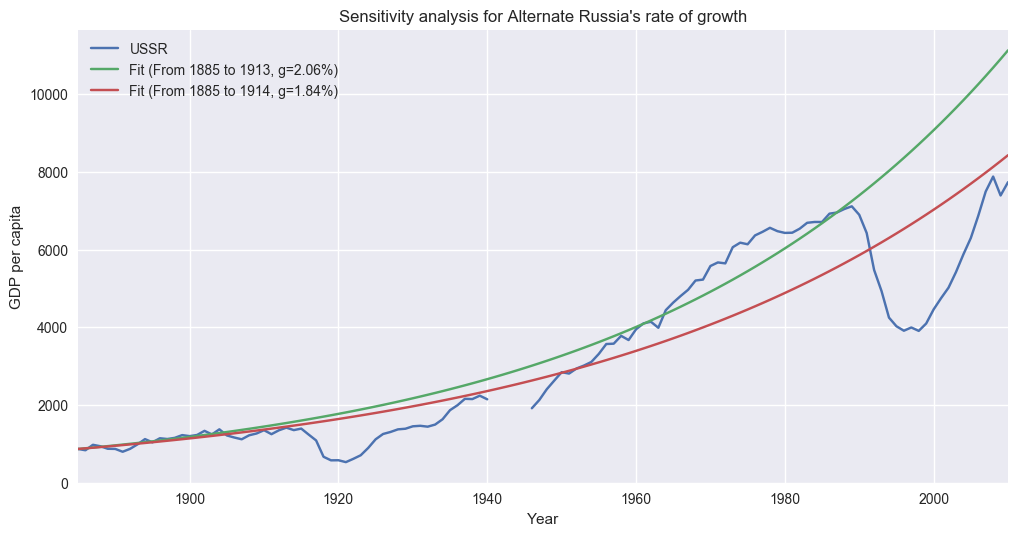

In [9]:
from scipy.optimize import curve_fit
from_year=1885
to_years=np.arange(1913,1915)
data2=data[(data['Year']>=from_year) & (data['Year']<=2010)][['USSR','Year']]

fig=plt.figure(figsize=(12,6))
ax=plt.gca()
# Let's get mean growth
data2.plot(x='Year',y='USSR',ax=ax)
ax=plt.gca()
pal=sns.color_palette("deep", len(to_years)+1)
for i,to_year in enumerate(to_years):
    data3=data2[(data2['Year']>=from_year) & (data2['Year']<=to_year)][['USSR','Year']]
    mean_tsar=data3['USSR'].pct_change().mean()
    label='Fit (From 1885 to '+str(to_year)+', g='+str(round(mean_tsar*100,2))+'%)'
    data2[label]=data3['USSR'][data2['Year']==from_year].values*np.power((1+mean_tsar),data2['Year']-from_year)
    data2.plot(x='Year',y=label,ax=ax,c=pal[i+1])
plt.ylabel('GDP per capita')
plt.title('Sensitivity analysis for Alternate Russia\'s rate of growth')

['Portugal ', 'USSR', '8 L. America', '15 L. America', 'L. America', 'Japan ', 'Hong Kong', 'Singapore ', 'Lebanon ', 'Syria ', 'W. Bank & Gaza ', 'Total World']


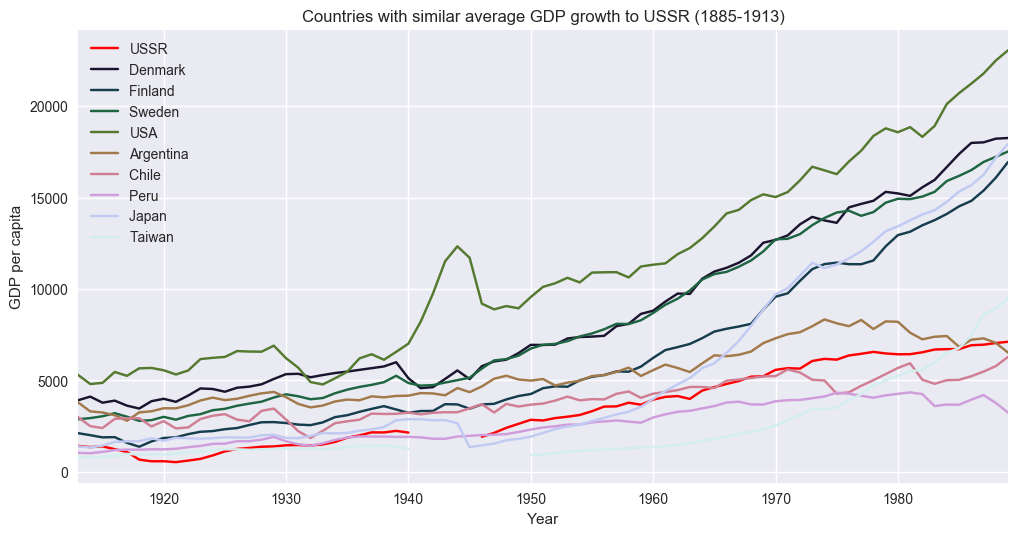

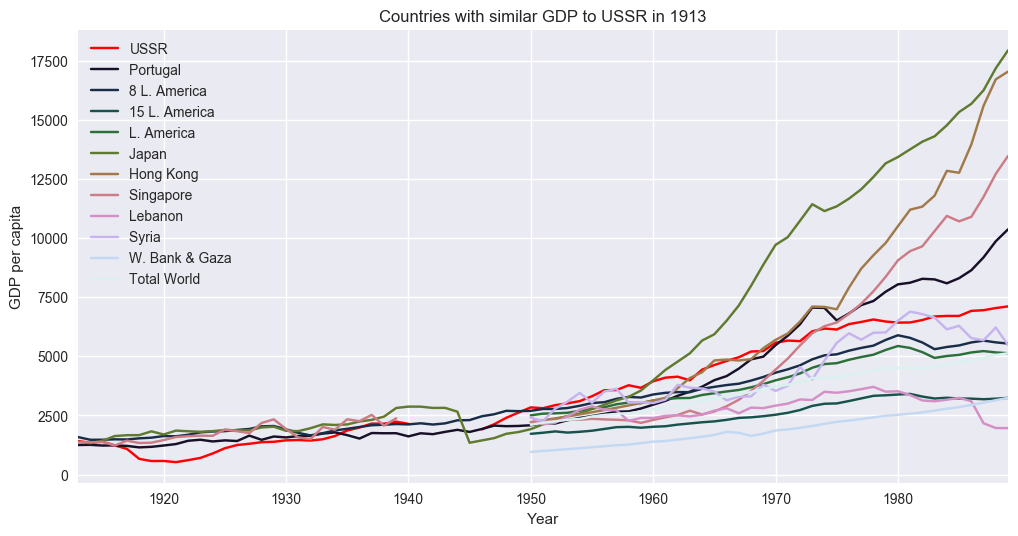

In [10]:
#Countries with similar rate of growth
to_year=1913
fig=plt.figure(figsize=(12,6))
data_c=data[(data['Year']>=from_year) & (data['Year']<=to_year)]
mean_tsar=data_c['USSR'].pct_change().mean()
e=mean_tsar/10
all_means=data_c.pct_change().mean().dropna()
close_means=all_means[(all_means>mean_tsar-e)&(all_means<mean_tsar+e)]
countries=close_means.index.tolist()
countries.remove('USSR')
#print(countries)
data_plot=data[(data['Year']>=from_year) & (data['Year']<=1989)  ][['USSR']+countries+['Year']]
data_plot=data[(data['Year']>=1913) & (data['Year']<=1989)  ][['USSR']+countries+['Year']]
pal=[(1,0,0,1)]+sns.color_palette("cubehelix", len(countries)) 
data_plot.plot(x='Year',ax=plt.gca(),color=pal)
plt.ylabel('GDP per capita')
plt.title('Countries with similar average GDP growth to USSR (1885-1913)')
#Countries with similar GDP
year=1913
fig=plt.figure(figsize=(12,6))
all_gdp=data[data['Year']==year].dropna(axis=1)
gdp_tsar=data[data['Year']==year]['USSR'].values[0]
e=gdp_tsar/8
close_means=all_gdp[(all_gdp<gdp_tsar+e) &(all_gdp>gdp_tsar-e)]
countries2=close_means.dropna(axis=1).columns.tolist()
print(countries2)
countries2.remove('USSR')
data_plot=data[(data['Year']>=1913) & (data['Year']<=1989)  ][['USSR']+countries2+['Year']]
pal=[(1,0,0,1)]+sns.color_palette("cubehelix", len(countries2)) 
data_plot.plot(x='Year',ax=plt.gca(),color=pal)
plt.ylabel('GDP per capita')
plt.title('Countries with similar GDP to USSR in 1913')

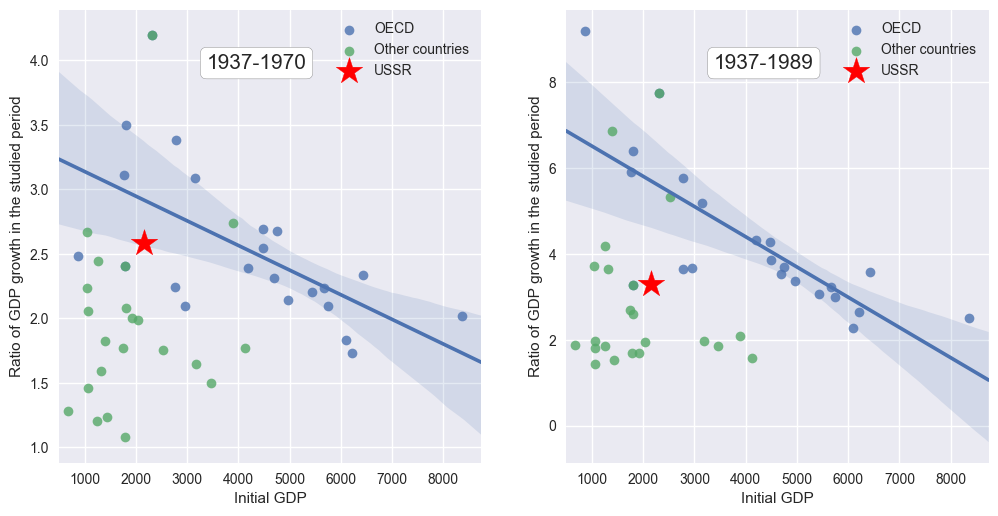

In [11]:
oecd=['Australia ','Austria ','Belgium ','Canada',
      'Denmark ','France','Germany ','Greece ',
      'Italy','Japan ','S. Korea ','Mexico ',
      'Netherlands','New Zealand','Norway ','Portugal ',
      'Spain ','Sweden ','Switzerland ','United Kingdom',
      'USA','Ireland ']
other=['India ','Argentina ','Brazil ',
       'Chile ','Colombia ','Mexico ','Peru ',
       'Uruguay','Venezuela','Bolivia ','Costa Rica',
       'Cuba','Ecuador ','El Salvador','Honduras',
       'Nicaragua','Japan ','Philippines','Taiwan',
      'Malaysia ','Singapore ','Sri Lanka','South Africa']

def plot(countries,label,from_year,to_year,fit=0):
    if(isinstance(countries, str)): 
        data_plot=data[(data['Year']==from_year) | (data['Year']==to_year)]
    else:
        data_plot=data[(data['Year']==from_year) | (data['Year']==to_year)][['Year']+countries]
    ratio=(data_plot[data_plot['Year']==to_year][countries].values/data_plot[data_plot['Year']==from_year][countries].values).ravel()
    initial=data_plot[data_plot['Year']==from_year][countries].values.ravel()
    if label=='USSR':
        plt.scatter(initial,ratio,c='red',marker='*',s=400,label='USSR',axes=plt.gca())       
    else:
        sns.regplot(initial,ratio,label=label,ax=plt.gca(),fit_reg=fit)
def add_things(from_year,to_year,ax):
    plt.ylabel('Ratio of GDP growth in the studied period')
    plt.xlabel('Initial GDP')
    plt.legend()
    label=str(from_year)+'-'+str(to_year)
    plt.gca().annotate(label,xy=(0.35,0.87),xycoords='axes fraction',bbox=dict(boxstyle="round", fc="white", ec="gray"),size=15)

def plot_subplot(from_year,to_year,ax):
    plot(oecd,'OECD',from_year,to_year,1)
    plot(other,'Other countries',from_year,to_year,0)
    plot('USSR','USSR',from_year,to_year)
    add_things(from_year,to_year,ax)
from_year=1937
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
plt.subplot(1,2,1)
plot_subplot(from_year,1970,axes[0])
plt.subplot(1,2,2)
plot_subplot(from_year,1989,axes[1])


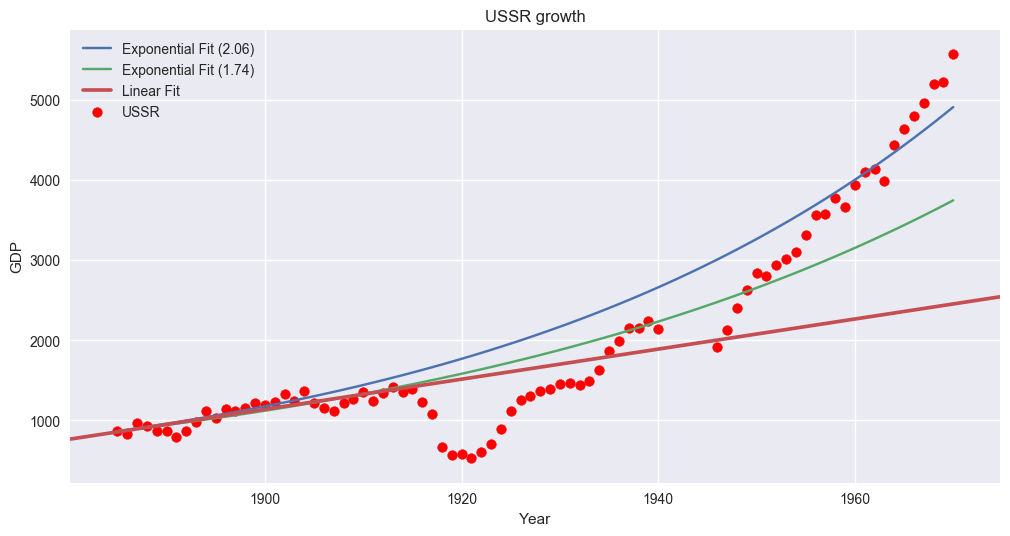

In [12]:
country='USSR'
from_year=1885
end_first=1913
end_last=1970

data2=data[(data['Year']>=from_year) & (data['Year']<=end_last)][['Year',country]]
data3=data[(data['Year']>=from_year) & (data['Year']<=end_first)][['Year',country]]

# Let's get mean growth
plt.figure(figsize=(12,6))
mean_tsar=data3[country].pct_change().mean()
data2['Exponential Fit (2.06)']=data2[data2['Year']==from_year][country].values*np.power((1+mean_tsar),data2['Year']-from_year)
data2['Linear Fit']=data2[data2['Year']==from_year][country].values+(1+mean_tsar)*(data2['Year']-from_year)
data2['Exponential Fit (1.74)']=data2[data2['Year']==from_year][country].values*np.power((1+1.74/100),data2['Year']-from_year)

plt.plot(data2['Year'],data2['Exponential Fit (2.06)'],axes=plt.gca())
plt.plot(data2['Year'],data2['Exponential Fit (1.74)'],axes=plt.gca())
plt.scatter(data2['Year'],data2[country],color='red',axes=plt.gca())
sns.regplot(data=data3,x='Year',y=country,ax=plt.gca(),scatter=False,ci=0,label='Linear Fit')
plt.ylabel('GDP')
plt.title(country+' growth')
plt.legend()
#print(data2[data2['Year']>1930])